In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [3]:
features = ['Time', 'L1' , 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 
            'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 
            'Total_Force_Left', 'Total_Force_Right']

In [4]:
!mkdir CSV

for name in os.listdir('Physionet'):
  if 'Co' in name or 'Pt' in name:
    df = pd.read_csv('Physionet/' + name, header = None, sep='\t')
    df.columns = features
      
    # store dataframe into csv file
    name = 'CSV/' + name.split('.')[0]+'.csv'
    df.to_csv(name, index = None)

A subdirectory or file CSV already exists.


## Data Visualization

(1001, 19)
(1001, 19)


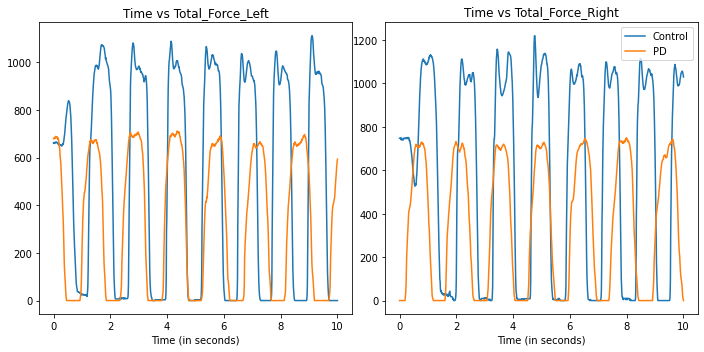

In [4]:
pd_subject = 'GaPt03_01'
control_subject = 'GaCo01_01'

pd_df = pd.read_csv('CSV/' + pd_subject + '.csv').head(1001)
control_df = pd.read_csv('CSV/' + control_subject + '.csv').head(1001)
print(pd_df.shape)
print(control_df.shape)

nrows = 1
ncols = 2

fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

for i, fname in enumerate(['Total_Force_Left', 'Total_Force_Right']):
  plt.subplot(nrows, ncols, i+1)
  plt.tight_layout()
  plt.title("Time vs " + fname)
  plt.plot(control_df.Time, control_df[fname])
  plt.plot(pd_df.Time, pd_df[fname])
  plt.xlabel('Time (in seconds)')

plt.legend(["Control", "PD",]) 
plt.show()

In [6]:
demographics = pd.read_csv('Physionet/demographics.txt', delim_whitespace=True)
sub_id = demographics.ID.to_list()
sub_names = []
for name in os.listdir('CSV'):
  sub_name = name.split('_')[0]
  sub_names.append(sub_name)

print("Subjects Count (in demographics) = ", len(sub_id))
print("Files count = ", len(sub_names))

Subjects Count (in demographics) =  166
Files count =  306


In [7]:
demographics.HoehnYahr
demographics['HoehnYahr'] = demographics['HoehnYahr'].fillna(0)
demographics.HoehnYahr.value_counts()

0.0    73
2.0    55
2.5    28
3.0    10
Name: HoehnYahr, dtype: int64

In [10]:
demographics['HoehnYahr'].replace({2.5: 1}, inplace=True)
demographics['HoehnYahr'] = demographics['HoehnYahr'].astype(int)
demographics.HoehnYahr.value_counts()

0    72
2    55
1    28
3    10
Name: HoehnYahr, dtype: int64

In [12]:
!mkdir Final
!mkdir Final/train
!mkdir Final/test

count = len(os.listdir('CSV'))
train_count = int(70/100*count)
test_count = count - train_count

print("Training Count Subjects = ", train_count)
print("Test Count Subjects = ", test_count)

category = 'train'
counter = 1

ypath = 'Final/y_' + category + '.txt'
yfile = open(ypath, "a")
hypath = 'Final/hyscore_' + category + '.txt'
hyfile = open(hypath, "a")

for name in os.listdir('CSV'):
  if counter == train_count + 1:
    yfile.flush()
    yfile.close()
    hyfile.flush()
    hyfile.close()
    
    category = 'test'    
    ypath = 'Final/y_' + category + '.txt'
    yfile = open(ypath, "a")
    hypath = 'Final/hyscore_' + category + '.txt'
    hyfile = open(hypath, "a")
  print(counter, name, category)
  
  sub_name = name.split('_')[0]
  sub_class = demographics[demographics['ID'] == sub_name]['Group'].to_string(index=False).strip()
  hy_class = demographics[demographics['ID'] == sub_name]['HoehnYahr'].to_string(index=False).strip()
  sub_data = pd.read_csv('CSV/' + name)
  features = sub_data.columns.to_list()

  full_size = 100
  overlap = 0.5
  overlap_size = int(full_size * overlap / 2)
  entry_size = full_size - overlap_size
  
  for i in range(0, sub_data.shape[0], entry_size):
    if sub_data.shape[0] >= i + entry_size + overlap_size:
      yfile.write(sub_class + "\n")
      hyfile.write(hy_class + "\n")
      
      for fname in features:
        path_name = 'Final/' + category + '/'
        file_name = fname + '_' + category + '.txt'
        with open(path_name + file_name, 'a') as feat_file:
          arr = sub_data.iloc[i:i + entry_size + overlap_size, ][fname].to_numpy()
          # print(i, len(arr), end = ' | ')
          feat_file.write(' '.join(map(str, arr)) + "\n")

  counter = counter + 1
yfile.flush()
yfile.close()
hyfile.flush()
yfile.close()

A subdirectory or file Final already exists.
The syntax of the command is incorrect.
The syntax of the command is incorrect.


Training Count Subjects =  214
Test Count Subjects =  92
1 GaCo01_01.csv train
2 GaCo02_01.csv train
3 GaCo02_02.csv train
4 GaCo03_01.csv train
5 GaCo03_02.csv train
6 GaCo04_01.csv train
7 GaCo04_02.csv train
8 GaCo05_01.csv train
9 GaCo05_02.csv train
10 GaCo06_01.csv train
11 GaCo06_02.csv train
12 GaCo07_01.csv train
13 GaCo07_02.csv train
14 GaCo08_01.csv train
15 GaCo08_02.csv train
16 GaCo09_01.csv train
17 GaCo09_02.csv train
18 GaCo10_01.csv train
19 GaCo10_02.csv train
20 GaCo11_01.csv train
21 GaCo12_01.csv train
22 GaCo13_01.csv train
23 GaCo13_02.csv train
24 GaCo13_10.csv train
25 GaCo14_01.csv train
26 GaCo14_02.csv train
27 GaCo14_10.csv train
28 GaCo15_01.csv train
29 GaCo15_02.csv train
30 GaCo15_10.csv train
31 GaCo16_01.csv train
32 GaCo16_02.csv train
33 GaCo16_10.csv train
34 GaCo17_01.csv train
35 GaCo17_02.csv train
36 GaCo17_10.csv train
37 GaCo22_01.csv train
38 GaCo22_10.csv train
39 GaPt03_01.csv train
40 GaPt04_01.csv train
41 GaPt05_01.csv train
42 GaPt06

## Load Dataset - Training and Testing

In [9]:
def load_file(filepath):
	dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files into a 3D array of [samples, timesteps, features]
def load_category(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = np.dstack(loaded)
	return loaded


# load a dataset category, such as train or test
def load_dataset_category(category, prefix=''):
	# load all 19 files as a single array
	filenames = []
	for fname in features:
		filenames.append(category + '/' + fname + '_' + category + '.txt')

	X = load_category(filenames, prefix)
	y = load_file(prefix + 'y_'+ category +'.txt')
	hy = load_file(prefix + 'hyscore_'+ category +'.txt')
	return X, y, hy

# returns train and test X and y elements
def load_dataset(prefix=''):
	trainX, trainy, trainHY = load_dataset_category('train', prefix)
	print(trainX.shape, trainy.shape, trainHY.shape)
	testX, testy, testHY = load_dataset_category('test', prefix)
	print(testX.shape, testy.shape, testHY.shape)
 
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode
	trainy = tf.keras.utils.to_categorical(trainy)
	trainHY = tf.keras.utils.to_categorical(trainHY)
	testy = tf.keras.utils.to_categorical(testy)
	testHY = tf.keras.utils.to_categorical(testHY)  
 
	return trainX, trainy, trainHY, testX, testy, testHY

In [10]:
trainX, trainy, trainHY, testX, testy, testHY = load_dataset('Final/')
print("Training Data = ", trainX.shape)
print("Training Class = ", trainy.shape)
print("Training HoehnYahr Class = ", trainHY.shape)
print("Test Data = ", testX.shape)
print("Test Class = ", testy.shape)
print("Test HoehnYahr Class = ", testHY.shape)

(30265, 100, 19) (30265, 1) (30265, 1)
(13761, 100, 19) (13761, 1) (13761, 1)
Training Data =  (30265, 100, 19)
Training Class =  (30265, 2)
Training HoehnYahr Class =  (30265, 4)
Test Data =  (13761, 100, 19)
Test Class =  (13761, 2)
Test HoehnYahr Class =  (13761, 3)


### HY Model

In [17]:
verbose, epochs, batch_size = 1, 500, 32
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainHY.shape[1]

DESIRED_ACCURACY = 0.97

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > DESIRED_ACCURACY:
      print("Reached " + str(DESIRED_ACCURACY*100)  + "accuracy")
      self.model.stop_training = True

callbacks = myCallback()
HYmodel = tf.keras.models.Sequential()
HYmodel.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
HYmodel.add(tf.keras.layers.MaxPooling1D(pool_size=2))
HYmodel.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
HYmodel.add(tf.keras.layers.MaxPooling1D(pool_size=2))
HYmodel.add(tf.keras.layers.Dropout(0.5))
HYmodel.add(tf.keras.layers.Flatten())
HYmodel.add(tf.keras.layers.Dense(100, activation='relu'))
HYmodel.add(tf.keras.layers.Dense(n_outputs, activation='softmax'))

HYmodel.compile(loss = 'categorical_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), 
              metrics =[tf.keras.metrics.TruePositives(name='tp'),
                        tf.keras.metrics.FalsePositives(name='fp'),
                        tf.keras.metrics.TrueNegatives(name='tn'),
                        tf.keras.metrics.FalseNegatives(name='fn'),
                        'accuracy',
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc')])
HYmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 64)            3712      
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            12352     
                                                                 
 dropout (Dropout)           (None, 96, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 48, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                        

### Train the model

In [14]:
with tf.device('/device:GPU:0'):
  HY_history = HYmodel.fit(trainX,
                          trainHY,
                          validation_data=(testX, testHY),
                          epochs = epochs, 
                          batch_size = batch_size, 
                          verbose = verbose,
                          callbacks = [callbacks])

Epoch 1/500
946/946 [==============================] - 21s 20ms/step - loss: 1.5715 - tp: 24209.0000 - fp: 6056.0000 - tn: 24209.0000 - fn: 6056.0000 - accuracy: 0.7999 - precision: 0.7999 - recall: 0.7999 - auc: 0.8603 - val_loss: 0.5902 - val_tp: 9798.0000 - val_fp: 3963.0000 - val_tn: 9798.0000 - val_fn: 3963.0000 - val_accuracy: 0.7120 - val_precision: 0.7120 - val_recall: 0.7120 - val_auc: 0.7618
Epoch 2/500
946/946 [==============================] - 19s 20ms/step - loss: 0.3246 - tp: 26349.0000 - fp: 3916.0000 - tn: 26349.0000 - fn: 3916.0000 - accuracy: 0.8706 - precision: 0.8706 - recall: 0.8706 - auc: 0.9332 - val_loss: 0.7259 - val_tp: 9410.0000 - val_fp: 4351.0000 - val_tn: 9410.0000 - val_fn: 4351.0000 - val_accuracy: 0.6838 - val_precision: 0.6838 - val_recall: 0.6838 - val_auc: 0.7113
Epoch 3/500
946/946 [==============================] - 19s 20ms/step - loss: 0.2598 - tp: 27183.0000 - fp: 3082.0000 - tn: 27183.0000 - fn: 3082.0000 - accuracy: 0.8982 - precision: 0.8982 -

### Save the model

In [ ]:
HYmodel.save("Model/HY_Final_Model.h5")
print("HY_Model saved Successfully!")

HY_Model saved Successfully!


In [ ]:
HYmodel = tf.keras.models.load_model("Model/HY_Final_Model.h5")

### Plot the graphs

In [ ]:
# Plot the accuracy and loss functions
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title('Training and Validation ' + string)
  plt.show()

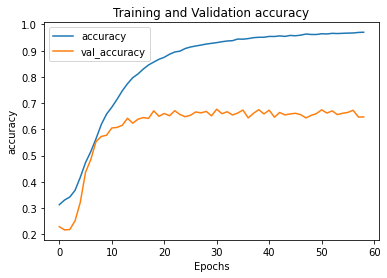

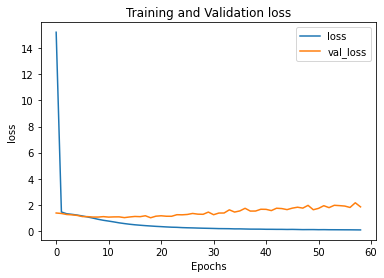

In [ ]:
plot_graphs(HY_history, "accuracy")
plot_graphs(HY_history, "loss")

### Evaluation of Model

In [ ]:
def model_evaluate(model, target, testX, testy):
  y_pred = model.predict(testX)
  y_pred = np.argmax(y_pred, axis=1)
  y_test = np.argmax(testy, axis=1)

  # Confusion matrix
  print('Confusion Matrix')

  cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
  # Calculate accuracy
  cm_np = cm.numpy()
  conf_acc = accuracy_score(y_test, y_pred) * 100
  print("Accuracy for Test Data = ", conf_acc)

  plt.figure(figsize = (12,8))
  seaborn.heatmap(cm, annot=True, fmt='d')
  plt.title("Confusion Matrix for Test Data")
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  # Classification Report
  print('\nClassification Report')
  print(classification_report(y_test, y_pred))

  # Cohen Kappa Score
  print('\nCohen Kappa Score')
  print(cohen_kappa_score(y_test, y_pred))

  # Precision vs Recall Curve
  print('\nPrecision vs Recall Curve')
  fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

  y_test = tf.keras.utils.to_categorical(y_test)
  y_pred = tf.keras.utils.to_categorical(y_pred)
  n_classes = 2

  precision = dict()
  recall = dict()

  for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                          y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
      
  plt.xlabel("recall")
  plt.ylabel("precision")
  plt.legend(loc="best")
  plt.title("Precision vs. Recall curve")
  plt.show()

  # ROC Curve
  print('\nROC Curve')
  average = 'macro'
  fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
  for (idx, c_label) in enumerate(target):
      fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
      c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  print('ROC AUC score:', roc_auc_score(y_test, y_pred, average=average))

  c_ax.legend()
  c_ax.set_xlabel('False Positive Rate')
  c_ax.set_ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()

Confusion Matrix
Accuracy for Test Data =  89.67436263818907


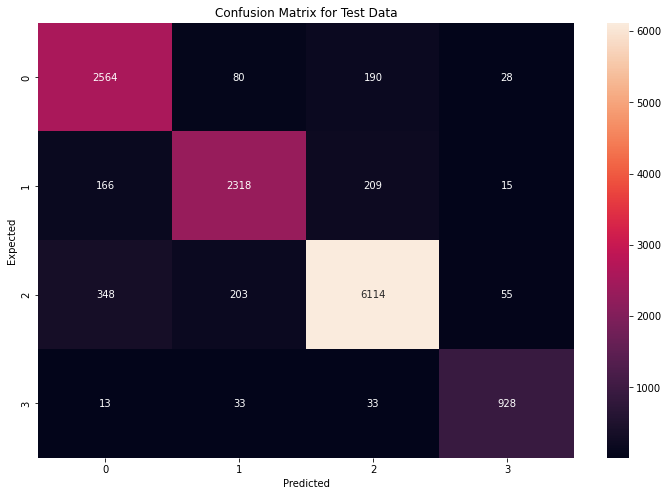


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2862
           1       0.88      0.86      0.87      2708
           2       0.93      0.91      0.92      6720
           3       0.90      0.92      0.91      1007

    accuracy                           0.90     13297
   macro avg       0.89      0.90      0.89     13297
weighted avg       0.90      0.90      0.90     13297


Cohen Kappa Score
0.8423538312049089

Precision vs Recall Curve


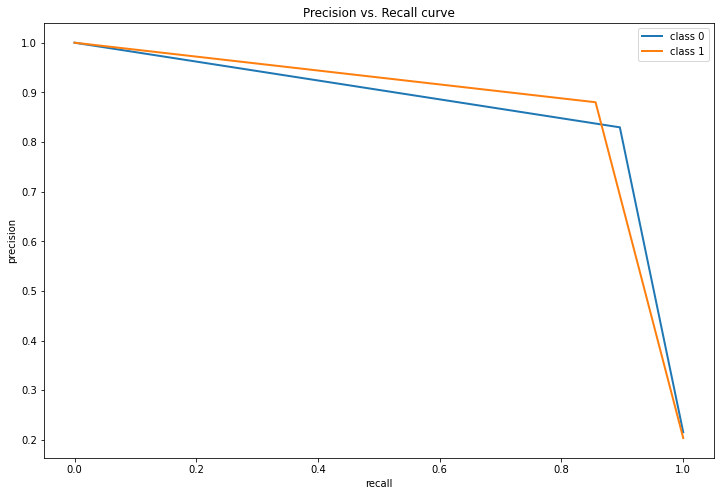


ROC Curve
ROC AUC score: 0.9286533824686953


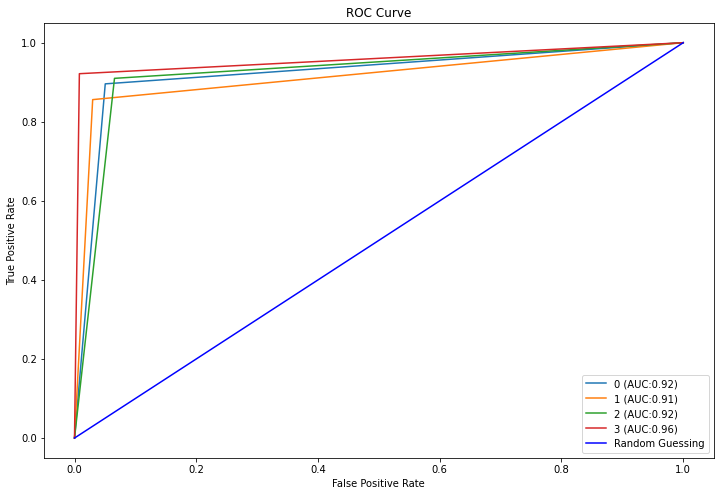

In [ ]:
model_evaluate(HYmodel, [0, 1, 2, 3], testX, testHY)